In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

In [2]:
# Importing the data and changing the column name
df_amazon = pd.read_csv('Amazon.csv')
df_amazon = df_amazon.rename(columns={"Expected profit ": "ExProfit"})
df_amazon

,Sr.No,Youtube,Facebook,Instagram,ExProfit
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df_amazon.info()                                    # Getting the info of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sr.No      200 non-null    int64  
 1   Youtube    200 non-null    float64
 2   Facebook   200 non-null    float64
 3   Instagram  200 non-null    float64
 4   ExProfit   200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df_amazon = df_amazon.drop(columns = 'Sr.No')       # Dropping the unrequired column

In [5]:
df_amazon.isnull().sum()                            # Check for nulll values 

Youtube      0
Facebook     0
Instagram    0
ExProfit     0
dtype: int64

In [6]:
X = df_amazon.iloc[:,0:3]                          # Getting the independent variables
X = sm.add_constant(X)                             # Adding the constant column 
X.head()

,const,Youtube,Facebook,Instagram
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [7]:
Y = df_amazon['ExProfit']                   # Getting the dependent variable
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: ExProfit, dtype: float64

In [8]:
# Splitting the data into training and testing 
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100)

In [9]:
df_amazon_lm = sm.OLS(train_y, train_X).fit()     # Fitting the OLS method onto the training data

In [10]:
print(df_amazon_lm.params)                        # Getting the parameters developed by the model

const        2.817275
Youtube      0.045586
Facebook     0.185698
Instagram    0.002233
dtype: float64


In [11]:
print(df_amazon_lm.summary())                     # Getting the summary of the built model

                            OLS Regression Results                            
Dep. Variable:               ExProfit   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           5.38e-75
Time:                        22:42:17   Log-Likelihood:                -316.74
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8173      0.357      7.881      0.0

# Summary Analysis
### **The p-value for Instagram is more than 0.05 given we are considering 5% significane level and hence, we can conclude that Instagram mode of advertisement is not a good investment.** ###

<Figure size 576x432 with 0 Axes>

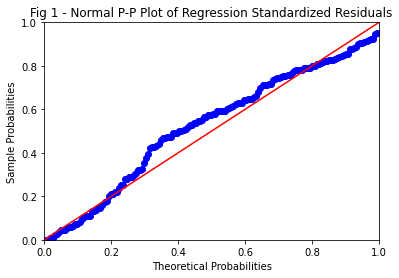

In [12]:
# Getting the residuals of the model and building a Probability-Probability plot

df_amazon_resid = df_amazon_lm.resid
probplot = sm.ProbPlot( df_amazon_resid, fit = True )
plt.figure( figsize = (8, 6))
probplot.ppplot( line = '45')
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" ) # plots cummulative probability
plt.show()6

# P-P Plot analysis
### The p-p pot shows a nearly linear relation between the residuals and hence, it is a satisfactory result. ###

Text(0.5, 1.0, 'Histogram for the Z-Score')

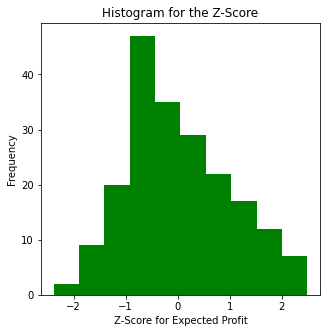

In [13]:
# Calculating  the z-score and plotting the histogram for the calcultaed z-score

df_amazon['z_score_profit'] = zscore(df_amazon['ExProfit'])
fig, ax = plt.subplots(figsize = (5,5))
ax.hist(df_amazon['z_score_profit'], color = 'green', bins = 10)
ax.set_xlabel('Z-Score for Expected Profit')
ax.set_ylabel('Frequency')
ax.set_title('Histogram for the Z-Score')

In [14]:
# Checking the outliers
df_amazon[(df_amazon.z_score_profit > 3.0) | (df_amazon.z_score_profit < -3.0)]

,Youtube,Facebook,Instagram,ExProfit,z_score_profit


In [15]:
# Making predictions for the testing data
pred_y = df_amazon_lm.predict( test_X )

In [16]:
# Calculating MSE for the test data
np.sqrt(mean_squared_error(test_y, pred_y))

1.316545776485108

# Task B

In [17]:
# Importing the data
df_remax = pd.read_csv('REMAX.csv')

In [18]:
df_remax.info()  # Getting the info of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
df_remax.describe()       # Getting the statistical summary for the numerical features

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:>

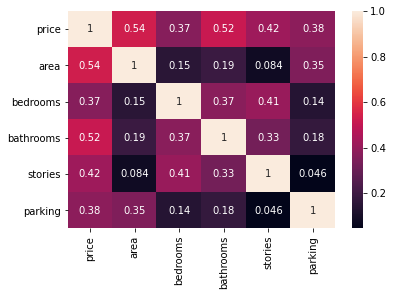

In [20]:
# Generating heatmap for the correlation
corr = df_remax.corr()
sns.heatmap(corr, annot = True)

In [21]:
# Seperating the dependent variables

X_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [22]:
# Filtering out the varibales who needs dummy variables
categorical_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 
                         'prefarea', 'furnishingstatus']

In [23]:
# Encoding the above filtered varibales
df_encoded = pd.get_dummies(df_remax[X_features],
columns = categorical_variables,
drop_first = True)

In [24]:
# Getting the generated dummy varibales
X_features = df_encoded.columns 
X_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'parking_1', 'parking_2', 'parking_3',
       'prefarea_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [25]:
# Adding constant to the data frame and seperating the dependent variable
X = sm.add_constant(df_encoded)
Y = df_remax['price']

In [26]:
# Splitting the data into training and testing 
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 40 )

In [27]:
# Fitting the OLS model on the training data
remax_model_1 = sm.OLS(train_y,train_X).fit()
print(remax_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     63.56
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.22e-98
Time:                        22:42:17   Log-Likelihood:                -6642.9
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     420   BIC:                         1.338e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [28]:
# Detecting Multicollinearity Using Variance Inflation Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [29]:
# Displaying the VIF factors
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,vif
0,area,8.337548
1,bedrooms,16.659178
2,bathrooms,9.432415
3,stories,7.914612
4,mainroad_yes,6.899018
5,guestroom_yes,1.479920
6,basement_yes,2.023115
7,hotwaterheating_yes,1.101559
8,airconditioning_yes,1.773103
9,parking_1,1.529220


In [30]:
# Elementing the columns having VIF greater than 4
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column
columns_with_large_vif

0            area
1        bedrooms
2       bathrooms
3         stories
4    mainroad_yes
Name: column, dtype: object

In [31]:
# Defining a list having the columns to be removed
columns_to_be_removed = ['area','bedrooms','bathrooms','stories','mainroad_yes']

In [32]:
# Defining the new feature variable having removed the VIF values greater than 4
X_new_features = list( set(X_features) - set(columns_to_be_removed))

In [33]:
get_vif_factors(X[X_new_features])

,column,vif
0,furnishingstatus_semi-furnished,1.468794
1,airconditioning_yes,1.460408
2,parking_2,1.351435
3,furnishingstatus_unfurnished,1.205410
4,prefarea_yes,1.383415
5,parking_1,1.308917
6,parking_3,1.028961
7,basement_yes,1.771693
8,hotwaterheating_yes,1.083479
9,guestroom_yes,1.450330


In [34]:
# Rebuilding the model for the new independent variables
train_X = train_X[X_new_features]
remax_model_2 = sm.OLS(train_y, train_X).fit()
print(remax_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              248.1
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   1.07e-170
Time:                        22:42:17   Log-Likelihood:                         -6930.4
No. Observations:                 436   AIC:                                  1.388e+04
Df Residuals:                     426   BIC:                                  1.392e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [35]:
# Defining the significant varibales and rebuilding the final model
significant_vars = ['airconditioning_yes','parking_2','hotwaterheating_yes','guestroom_yes','basement_yes',
                    'furnishingstatus_unfurnished','parking_1','furnishingstatus_semi-furnished','parking_3',
                    'prefarea_yes'
                   ]
train_X = train_X[significant_vars]
remax_model_3 = sm.OLS(train_y, train_X).fit()
print(remax_model_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              248.1
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   1.07e-170
Time:                        22:42:17   Log-Likelihood:                         -6930.4
No. Observations:                 436   AIC:                                  1.388e+04
Df Residuals:                     426   BIC:                                  1.392e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

# Summary Analysis

### 1. As we can see there are 10 significant variabels.
### 2. The prices are influenced positively if there is an Air Conditioning, Guestroom, Hot water heating, Basement, Prefarea.
### 3. The prices are also influenced on the number of parking spaces, and, the furnishing status (unfurnished and unfurnished only) 

# Task C

In [74]:
# Importing the data and removing renaming the column as it has a space error
df_rue = pd.read_excel ("Inventory.xlsx")
df_rue = df_rue.rename(columns = {' Cost':'Cost'})

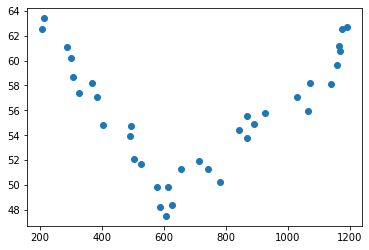

In [75]:
# Developing the scatter plot
plt.scatter(x = df_rue['Quantity'],y = df_rue['Cost'])

In [76]:
# Detecting the null values
df_rue.isnull().sum()

Cost        0
Quantity    0
dtype: int64

In [77]:
# Adding the constant to the data
X = sm.add_constant(df_rue['Quantity'])
X.head()

,const,Quantity
0,1.0,844
1,1.0,503
2,1.0,300
3,1.0,869
4,1.0,525


In [78]:
# Seperating the dependent variable
Y = df_rue['Cost']

In [79]:
# Splitting the training and testing data
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )

In [80]:
# Building the OLS model on the training data
df_rue_lm = sm.OLS(train_y, train_X).fit()

In [81]:
# Displaying the parameters built from the model
print(df_rue_lm.params)

const       55.651110
Quantity     0.000612
dtype: float64


In [82]:
# Displaying the summary analysis of the model built
print(df_rue_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                   0.05072
Date:                Wed, 29 Sep 2021   Prob (F-statistic):              0.824
Time:                        22:42:45   Log-Likelihood:                -81.644
No. Observations:                  28   AIC:                             167.3
Df Residuals:                      26   BIC:                             170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6511      1.990     27.962      0.0

<Figure size 576x432 with 0 Axes>

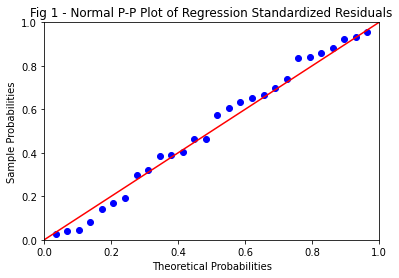

In [83]:
# Getting the residuals of the model and building a Probability-Probability plot
df_rue_resid = df_rue_lm.resid
probplot = sm.ProbPlot( df_rue_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" ) # plots cummulative probability
plt.show()

In [84]:
from scipy.stats import zscore

In [85]:
# Calculating the z-score for the Cost variable
df_rue['z_score_cost'] = zscore(df_rue.Cost)

In [86]:
# Detecting outliers
df_rue[(df_rue.z_score_cost > 3.0) | (df_rue.z_score_cost < -3.0)]

,Cost,Quantity,z_score_cost


In [87]:
# Building the model on test data
pred_y = df_rue_lm.predict(test_X)

In [88]:
# Calculating MSE
np.sqrt(mean_squared_error(test_y, pred_y))

4.554073712565095

# Summary Analysis
### 1. As we can see from the scatter plot, there is a non linear relationship between Quantity and Cost.
### 2. Though the P-P plot shows a satisfactory result and the MSE is 4.55, the R-Sqaure value is 0.002 which tells us that only 0.2% of variance of the dependent variable i.e. Cost is explained by the independent variable i.e. Quantity and hence, linear regression is not a good model for prediction